In [1]:
# Installing & Importing Packages

!pip install nltk
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Getting stopwords and punctuations to remove from reviews

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
stopwords_list = stopwords.words('english') + list(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
# Getting the Scraped Reviews into a Dataframe

import pandas as pd
train_reviews = pd.read_csv("amazon_product_reviews_ratings.csv")
train_reviews.head()

,Price,Review,Date,Rating,Rating_Value,URL
0,34.0,"I ordered a size:M , and this is very well mad...","Reviewed in the United States on May 7, 2024",5.0 out of 5 stars,5.0,https://www.amazon.com/Gap-womens-Logo-Hoodie-...
1,34.0,I wanted a go-to front zip hoodie to wear with...,"Reviewed in the United States on January 12, 2024",5.0 out of 5 stars,5.0,https://www.amazon.com/Gap-womens-Logo-Hoodie-...
2,34.0,"It looked short when I opened it, but it fits ...","Reviewed in the United States on September 15,...",5.0 out of 5 stars,5.0,https://www.amazon.com/Gap-womens-Logo-Hoodie-...
3,34.0,This was exactly what I pictured. It was thick...,"Reviewed in the United States on May 25, 2024",5.0 out of 5 stars,5.0,https://www.amazon.com/Gap-womens-Logo-Hoodie-...
4,34.0,Fit good,"Reviewed in the United States on September 2, ...",4.0 out of 5 stars,4.0,https://www.amazon.com/Gap-womens-Logo-Hoodie-...


In [31]:
# Assigning a Ground Truth to the Reviews based on the Star Rating

train_reviews['true_sentiment'] = ['positive' if x >= 4 
                                   else 'negative' if x <= 2 
                                   else 'none'
                                  for x in train_reviews.Rating_Value]
train_reviews = train_reviews[train_reviews.true_sentiment != 'none']
len(train_reviews[train_reviews.true_sentiment == 'positive'])

82

In [35]:
# Creating a list of all words in the reviews and prepping it for analysis

word_list = word_tokenize(train_reviews.Review.iloc[0])
word_dictionary = dict([(word, True) for word in word_list])
sample_tuple = (word_dictionary,'positive')

({'I': True,
  'ordered': True,
  'a': True,
  'size': True,
  ':': True,
  'M': True,
  ',': True,
  'and': True,
  'this': True,
  'is': True,
  'very': True,
  'well': True,
  'made': True,
  'am': True,
  '5': True,
  "'": True,
  '4': True,
  "''": True,
  'and122': True,
  'pounds': True,
  'it': True,
  'fits': True,
  'perfect': True,
  '.': True,
  'The': True,
  'stitching': True,
  'done': True,
  'the': True,
  'zipper': True,
  'easy': True,
  'to': True,
  'zip': True,
  'actually': True,
  'words': True,
  'can': True,
  'not': True,
  'say': True,
  'how': True,
  'lighter': True,
  'weight': True,
  'but': True,
  'thin': True,
  'at': True,
  'all': True,
  'look': True,
  'nice': True,
  'fit': True,
  'definitely': True,
  'tight': True,
  '(': True,
  ')': True,
  'oh': True,
  'in': True,
  'black': True,
  'put': True,
  'full': True,
  'hands': True,
  'pockets': True,
  'gap': True,
  'logo': True,
  'on': True,
  'inside': True,
  'stitched': True,
  'around':

In [37]:
training_data = []
reviews = list(train_reviews.Review)
true_sentiment = list(train_reviews.true_sentiment)

['I ordered a size:M , and this is very well made I am 5\'4" and122 pounds, it fits perfect . The stitching is well done, the zipper is easy to zip, actually words cannot say how a lighter weight but not thin at all can look this nice, the fit is definitely not tight(not) oh I ordered this in black, can put full hands in the pockets, the gap logo on the inside is stitched all around no loose ends, it is quite pretty, well worth the money, I didn\'t have a problem at all with any shrinkage, washed in machine and fully dried it, order one, I am not getting any bonus for this review so, it fits like a hoodie should fit, not as I said tight at all!!',
 'I wanted a go-to front zip hoodie to wear with casual jeans. This GAP hoodie is soft, well made, and very comfortable. (Nothing itchy or irritating) The strange thing is that it took two months to get to me. (I somewhat knew this when I ordered it as it gave me a window for delivery) I recently learned that these GAP hoodies are making a co

In [122]:
for i in range(0,len(reviews)):
    word_list = word_tokenize(reviews[i])
    word_list = [word for word in word_list if word.lower() not in stopwords_list]
    word_dictionary = dict([(word, True) for word in word_list])
    sample_tuple = (word_dictionary,true_sentiment[i])
    training_data.append(sample_tuple)

In [41]:
training_data[1]

({'wanted': True,
  'go-to': True,
  'front': True,
  'zip': True,
  'hoodie': True,
  'wear': True,
  'casual': True,
  'jeans': True,
  'GAP': True,
  'soft': True,
  'well': True,
  'made': True,
  'comfortable': True,
  'Nothing': True,
  'itchy': True,
  'irritating': True,
  'strange': True,
  'thing': True,
  'took': True,
  'two': True,
  'months': True,
  'get': True,
  'somewhat': True,
  'knew': True,
  'ordered': True,
  'gave': True,
  'window': True,
  'delivery': True,
  'recently': True,
  'learned': True,
  'hoodies': True,
  'making': True,
  'comeback': True,
  'pretty': True,
  'popular': True,
  'among': True,
  'teenagers': True,
  'much': True,
  'older': True,
  'teenager': True,
  '’': True,
  'hurry': True,
  'big': True,
  'deal': True,
  'another': True,
  'one': True,
  'would': True,
  'like': True,
  'go': True,
  'store': True,
  'see': True,
  'stock': True,
  'Happy': True,
  'purchase': True,
  'recommend': True,
  'product.FYI-I': True,
  '5': True,


In [43]:
# Installing Azure Package

!pip install azure-ai-textanalytics

     ---------------------------------------- 0.0/82.8 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.8 kB ? eta -:--:--
     ------------------ ------------------- 41.0/82.8 kB 653.6 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 82.8/82.8 kB 387.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/298.6 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/298.6 kB 1.9 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/298.6 kB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/298.6 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/298.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/298.6 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/298.6 kB 1.1 MB/s eta 0:00:01
   -------------------------------------  297.0/298.6 kB 965.4 kB

In [45]:
# Authenticating Connection with Azure

import azure

#key = '' #"<paste-your-text-analytics-key-here>"
#endpoint = '' #"<paste-your-text-analytics-endpoint-here>"

key = "6fa304d7949d42d3b53b029bcdef8fba"
endpoint = 'https://sgaddi.cognitiveservices.azure.com/' #"<paste-your-text-analytics-endpoint-here>"

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential


# Create a function to instantiate the TextAnalyticsClient object 
# with your key AND endpoint created above. 
# Then create a new client.

def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

In [47]:
# Create a new function called sentiment_analysis_example() that takes the client as an argument, 
# then calls the analyze_sentiment() function. 
# The returned response object will contain the sentiment score

def sentiment_analysis_example(client, review):
    
    documents = [review]
    response = client.analyze_sentiment(documents=documents)[0]
    print(response)
    
    
    sentiments = []
    
    for idx, sentence in enumerate(response.sentences):
        sentiments.append(sentence['sentiment'])
        
 # We can also assign a score of positive to each sentence with a positive sentiment score of greater than 0.5 
    # and a negative sentiment to those with a score of less than or equal to 0.5
    
#     for idx, sentence in enumerate(response.sentences):
#         if(sentence.confidence_scores.positive > 0.5):
#             sentiments.append('positive')
#         else:
#             sentiments.append('negative')
            
    return sentiments

In [55]:
# Running Sentiment Analysis on the Reviews using Azure

import requests
import time

azure_sentiments = []

review_number = 0
time_counter = time.time()

requests_per_second_limit = 100
requests_per_minute_limit = 300

for review in list(train_reviews.Review[0:100]):
    review_number+=1
    print(review_number)
    sentiment = sentiment_analysis_example(client, review)
    end_time = time.time()
    
    requests_in_this_second = review_number % requests_per_second_limit
    requests_in_this_minute = review_number % requests_per_minute_limit
    
    if requests_in_this_second == 0:
        time_taken_for_batch = end_time - time_counter
        if time_taken_for_batch < 1:
            time.sleep(1 - time_taken_for_batch)
        time_counter = time.time()
    
    if requests_in_this_minute == 0:
        time_taken_for_minute = end_time - time_counter
        if time_taken_for_minute < 60:
            time.sleep(60 - time_taken_for_minute)
        time_counter = time.time()  
    
    

    azure_sentiments.append(sentiment)

1
{'id': '0', 'sentiment': 'positive', 'warnings': [], 'statistics': None, 'confidence_scores': SentimentConfidenceScores(positive=1.0, neutral=0.0, negative=0.0), 'sentences': [SentenceSentiment(text=I ordered a size:M , and this is very well made I am 5'4" and122 pounds, it fits perfect . , sentiment=positive, confidence_scores=SentimentConfidenceScores(positive=1.0, neutral=0.0, negative=0.0), length=91, offset=0, mined_opinions=[]), SentenceSentiment(text=The stitching is well done, the zipper is easy to zip, actually words cannot say how a lighter weight but not thin at all can look this nice, the fit is definitely not tight(not) oh I ordered this in black, can put full hands in the pockets, the gap logo on the inside is stitched all around no loose ends, it is quite pretty, well worth the money, I didn't have a problem at all with any shrinkage, washed in machine and fully dried it, order one, I am not getting any bonus for this review so, it fits like a hoodie should fit, not as

In [57]:
azure_sentiments_updated = []
for review in azure_sentiments:
    Count_of_positive = 0
    Count_of_negative = 0
    for i in review:
        if i == 'positive':
            Count_of_positive += 1
        elif i == 'negative':
            Count_of_negative += 1
    if Count_of_positive > Count_of_negative:
        azure_sentiments_updated.append('positive')
    else:
        azure_sentiments_updated.append('negative')

In [59]:
azure_correct = 0
for i in range(0,len(train_reviews[0:100])):
    if list(train_reviews.true_sentiment)[i] == azure_sentiments_updated[i]:
        azure_correct += 1
azure_correct / 100

0.76

In [91]:
# Using Azure for Key Phrase Extraction from the Reviews

import os
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient
import time

cloud_words = []
text_analytics_client = TextAnalyticsClient(endpoint=endpoint, credential=AzureKeyCredential(key))

for i in range(0, 86, 10):
    chunk = train_reviews.iloc[i:i+10]
    articles = [x for x in chunk.Review]

    result = text_analytics_client.extract_key_phrases(articles)
    for idx, doc in enumerate(result):
        if not doc.is_error:
            print("Key phrases in article #{}: {}".format(
                i + 1,
                ", ".join(doc.key_phrases)
            ))
            cloud_words.append(doc.key_phrases)
    # Sleep for 5 seconds
    time.sleep(8)


cloud_words


Key phrases in article #1: and122 pounds, lighter weight, full hands, gap logo, loose ends, size, stitching, zipper, words, fit, black, pockets, inside, money, problem, shrinkage, machine, bonus, review, hoodie, 5'4
Key phrases in article #1: front zip hoodie, GAP hoodie, casual jeans, strange thing, two months, big deal, GAP store, window, delivery, comeback, teenagers, hurry, stock, purchase, product, FYI, 5’6” 107 lbs
Key phrases in article #1: 
Key phrases in article #1: transition weather, Amazing fit, zipper, color
Key phrases in article #1: 
Key phrases in article #1: super tiempo, daño
Key phrases in article #1: Excellent quality, GD, size
Key phrases in article #1: quality
Key phrases in article #1: Sudadera, marca, calidad
Key phrases in article #1: كيت, تج, ب, رعة
Key phrases in article #11: Size
Key phrases in article #11: 
Key phrases in article #11: buen estado, tiempo
Key phrases in article #11: quality, baby, price
Key phrases in article #11: everyday wear, Gap, cousins

[['and122 pounds',
  'lighter weight',
  'full hands',
  'gap logo',
  'loose ends',
  'size',
  'stitching',
  'zipper',
  'words',
  'fit',
  'black',
  'pockets',
  'inside',
  'money',
  'problem',
  'shrinkage',
  'machine',
  'bonus',
  'review',
  'hoodie',
  "5'4"],
 ['front zip hoodie',
  'GAP hoodie',
  'casual jeans',
  'strange thing',
  'two months',
  'big deal',
  'GAP store',
  'window',
  'delivery',
  'comeback',
  'teenagers',
  'hurry',
  'stock',
  'purchase',
  'product',
  'FYI',
  '5’6” 107 lbs'],
 [],
 ['transition weather', 'Amazing fit', 'zipper', 'color'],
 [],
 ['super tiempo', 'daño'],
 ['Excellent quality', 'GD', 'size'],
 ['quality'],
 ['Sudadera', 'marca', 'calidad'],
 ['كيت', 'تج', 'ب', 'رعة'],
 ['Size'],
 [],
 ['buen estado', 'tiempo'],
 ['quality', 'baby', 'price'],
 ['everyday wear',
  'Gap',
  'cousins',
  'texture',
  'material',
  'baby',
  'Colour',
  'picture',
  'style',
  'pro'],
 ['My Son', 'outfit', 'Grandson'],
 ['Excelente calidad', 'buen

In [118]:
# Prepping the Extracted Key Phrases for a Word Cloud

cloud_input = []
for element in cloud_words:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                cloud_input.append(item)
        else:
            cloud_input.append(element)

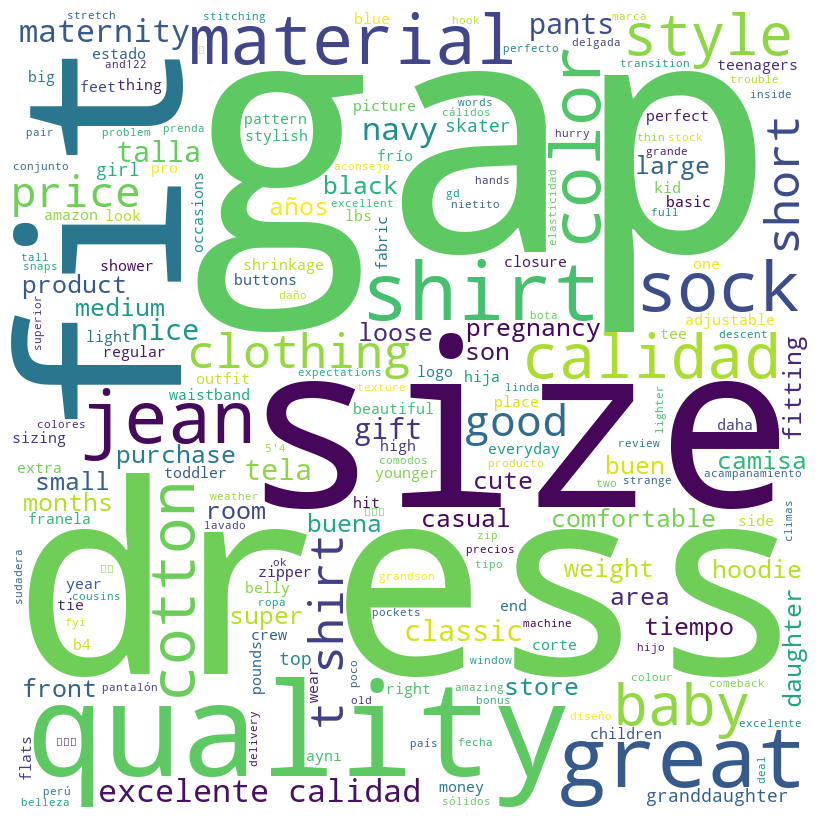

In [120]:
# Creating a Word Cloud using the Extracted Key Phrases

import matplotlib.pyplot as plt  # Use pyplot for plotting
import pandas as pd  # Ensure pandas is correctly imported
from wordcloud import WordCloud, STOPWORDS  # WordCloud and STOPWORDS for generating word clouds


# Initialize an empty string to store all words
comment_words = ''

# Loop through each entry in the cloud_input list
for i in range(len(cloud_input)):
    cloud_input[i] = cloud_input[i].lower()  # Convert to lowercase
    comment_words += " ".join(cloud_input[i].split()) + " "  # Concatenate words with spaces

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)